# Activity:
- Perform hyperparameter tuning to improve the model performance.
- Print the classification report.
- Compare and contrast different models and justify the best one.

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image,ImageOps
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow

In [3]:
# Dataset
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 1254s 7us/step


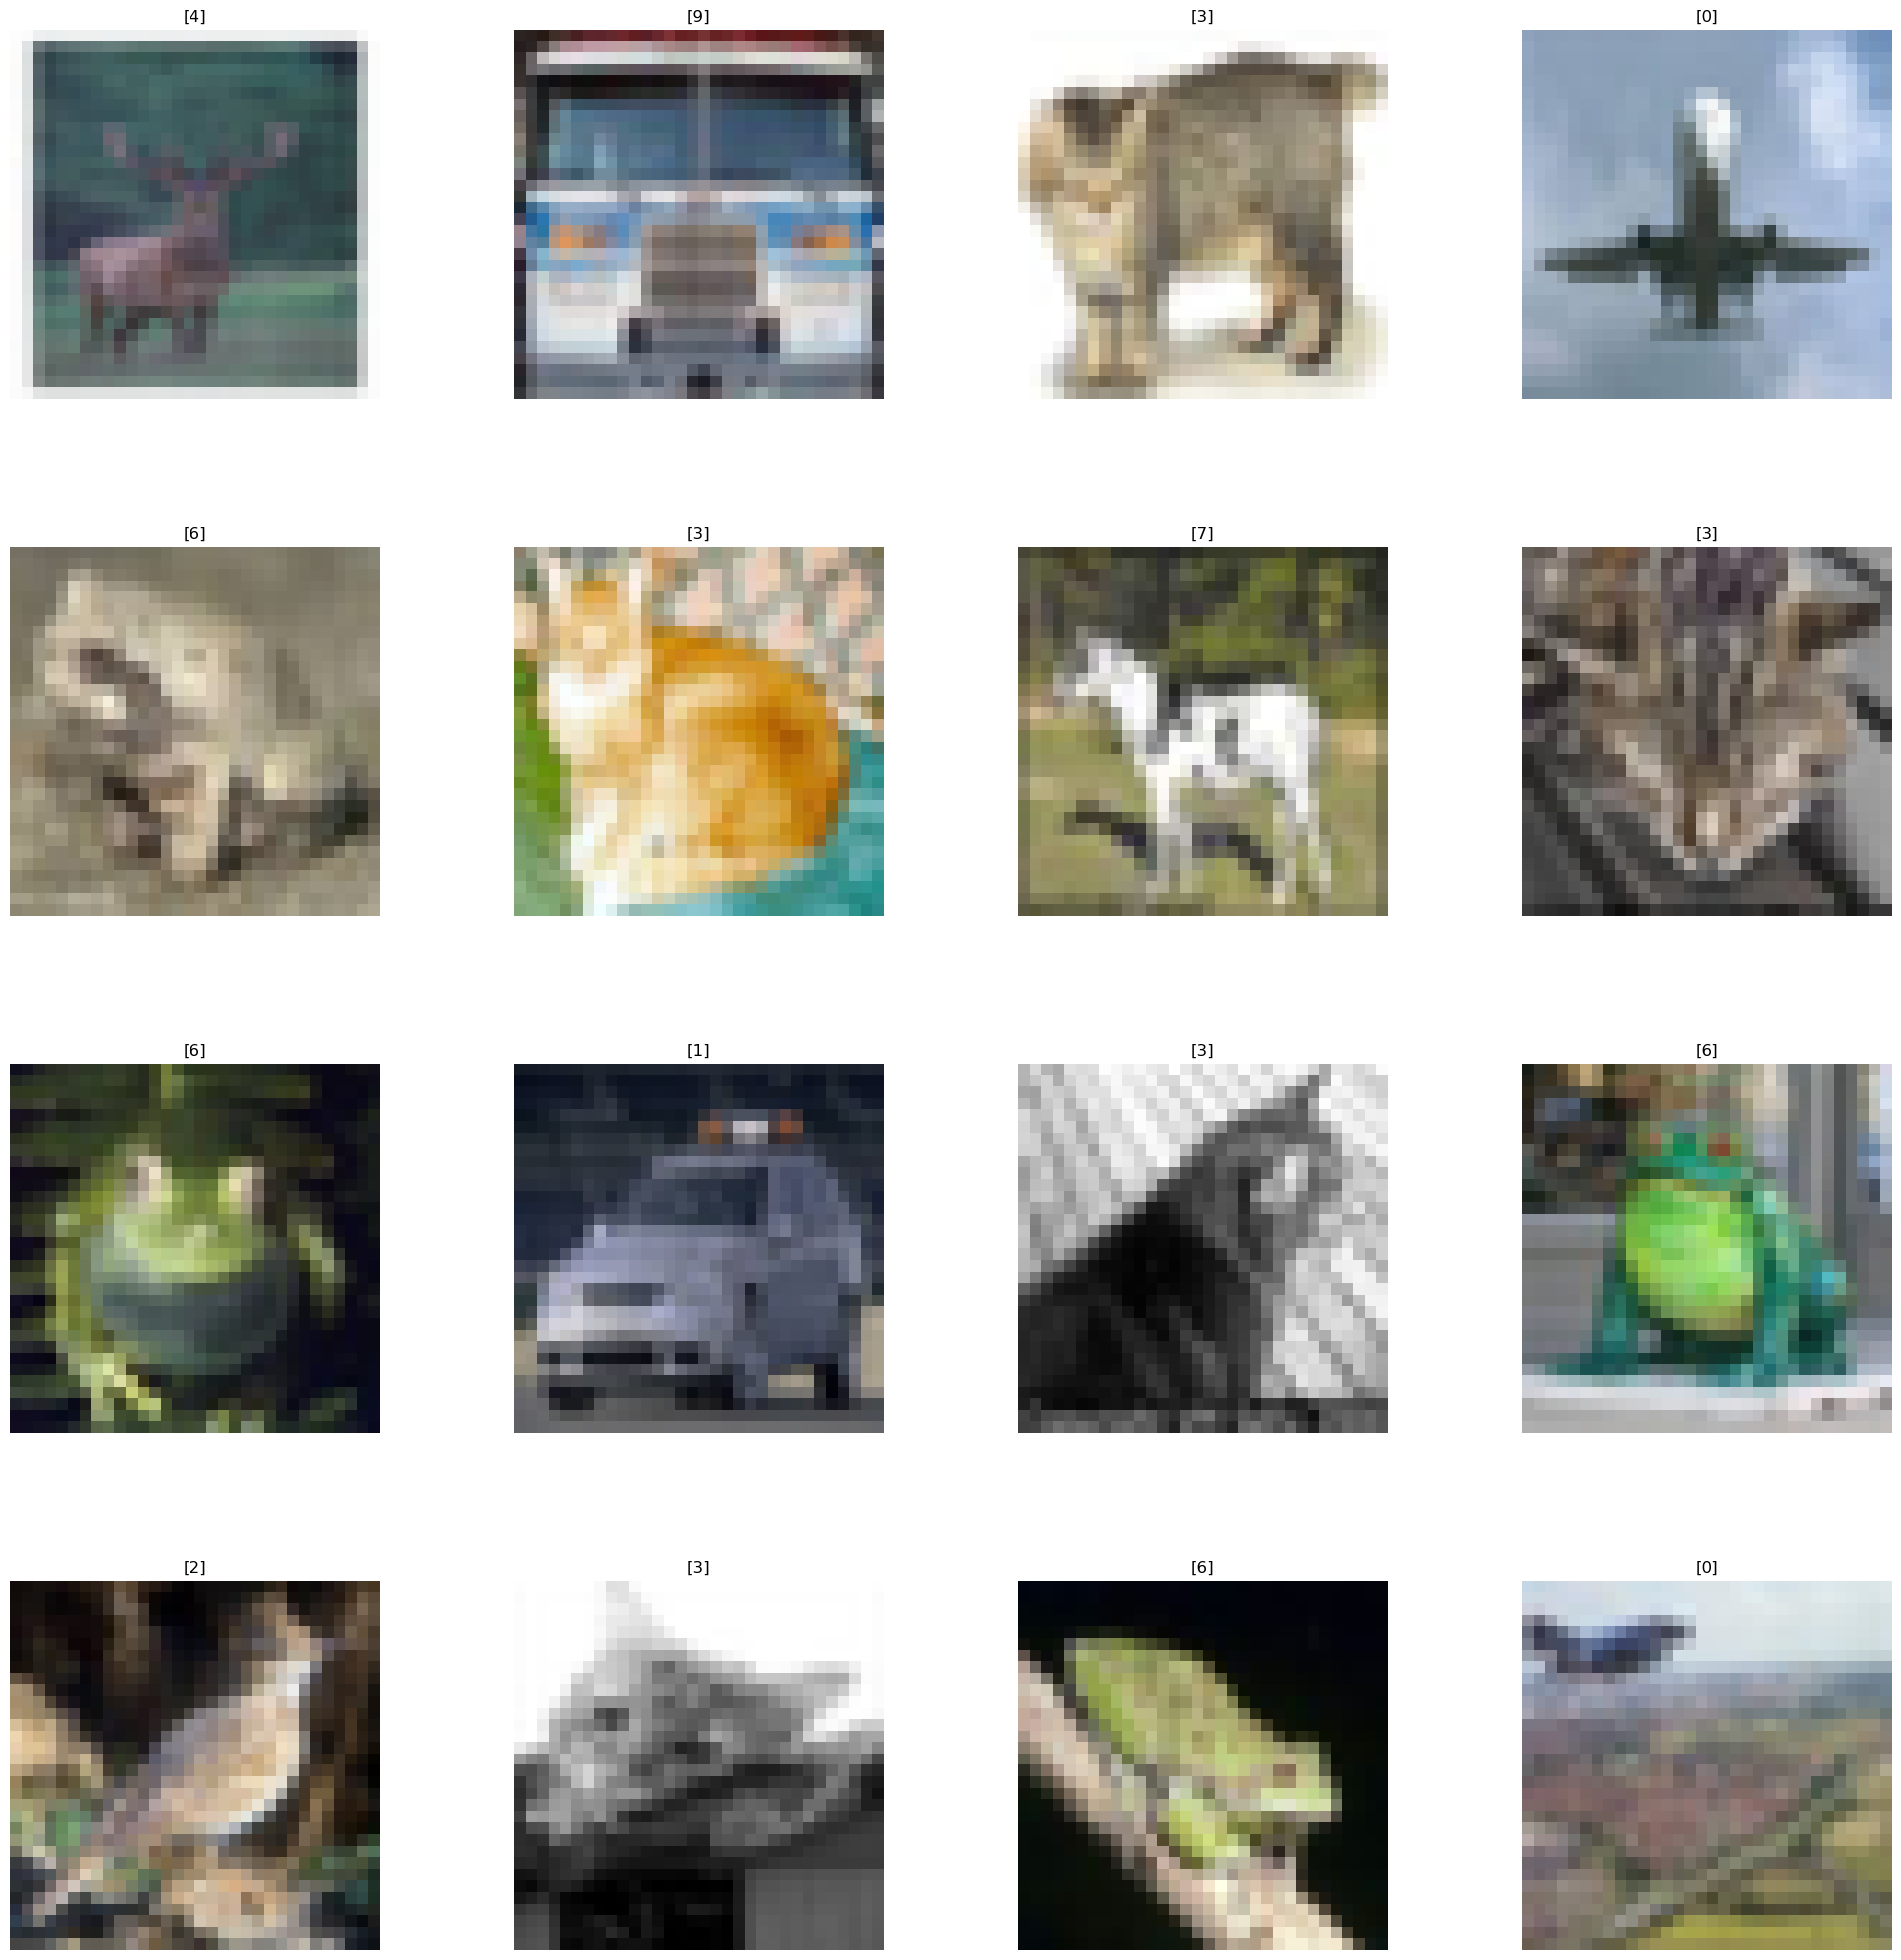

In [4]:
W_grid = 4 # Width of grid
L_grid = 4 # Length of grid

# Create a grid and figure, fig_size represents the size in inches.
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
#
axes = axes.ravel()

# Loop to display the images
n_training = len(TrainIn) # value is 16 here
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(TrainIn[index]) # Show a random image from the dataset
    axes[i].set_title(TrainOut[index]) # Set the title to the corresponding label
    axes[i].axis('off') # Don't show axis lines

plt.subplots_adjust(hspace = 0.4) # Space out the subplots

In [5]:
# Define the training dataset
img_rows, img_cols = 32, 32
num_classes=10
train_dataset = TrainIn.astype('float32')
test_dataset = TestIn.astype('float32')
train_dataset /= 255
test_dataset /= 255
print('train_dataset shape:', TrainIn.shape)
print(TrainIn.shape[0], 'train samples')
print(TestIn.shape[0], 'test samples')

train_dataset shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(TrainOut, num_classes)
test_labels = keras.utils.to_categorical(TestOut, num_classes)

In [7]:
# Train the model
np.random.seed(123) # Ensures the random numbers generated by NumPy are the same every time the code is run.
vasthu=Sequential() # Model is built in a sequential manner.
vasthu.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3))) # Layer 1: 32 filters, each of size 3x3, with 3 color channels (RGB).
vasthu.add(Conv2D(32,(3,3), activation='relu')) # Layer 2: Applies the Rectified Linear Unit activation function to the output of the layer.
vasthu.add(MaxPooling2D(pool_size=(2,2))) # Layer 3: Reduce the spatial dimensions of the feature maps, decreasing the number of parameters and computation, by taking the maximum value in a small window (pool size).
vasthu.add(Conv2D(64,(3,3), activation='relu')) # Layer 4
vasthu.add(Conv2D(64,(3,3), activation='relu')) # Layer 5
vasthu.add(MaxPooling2D(pool_size=(2,2)))
vasthu.add(Flatten()) # Convert the multi-dimensional feature maps into a single vector.
vasthu.add(Dense(10, activation='softmax')) # A fully connected layer with 10 neurons, is the O/P layer of the model and uses softmax to predict probability for all the 10 classes.

vasthu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile: Configure the learning function of the model.
TrainingLog=vasthu.fit(train_dataset, train_labels, epochs=10, validation_split = 0.1)  # Train: Train the model.

2025-02-21 17:06:15.563420: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-02-21 17:06:15.565427: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-02-21 17:06:15.565466: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-21 17:06:15.565625: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (client-0-sayan): /proc/driver/nvidia/version does not exist
2025-02-21 17:06:15.568065: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Te

Epoch 1/10
1407/1407 [==============================] - 30s 21ms/step - loss: 1.6904 - accuracy: 0.3797 - val_loss: 1.0879 - val_accuracy: 0.6166
Epoch 2/10
 889/1407 [=================>............] - ETA: 34s - loss: 1.0597 - accuracy: 0.6281

KeyboardInterrupt: 

Text(0.5, 1.0, 'Performance of Normal-CNN')

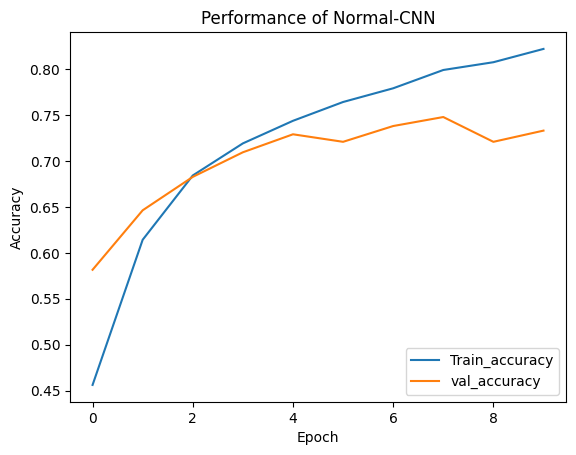

In [ ]:
# Visualise the performance of the trained CNN, Plot the accuracy graph
plt.plot(TrainingLog.history['accuracy'], label='Train_accuracy')
plt.plot(TrainingLog.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Performance of Normal-CNN')

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7330 - loss: 0.8111
Test Accuracy: 0.7264999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


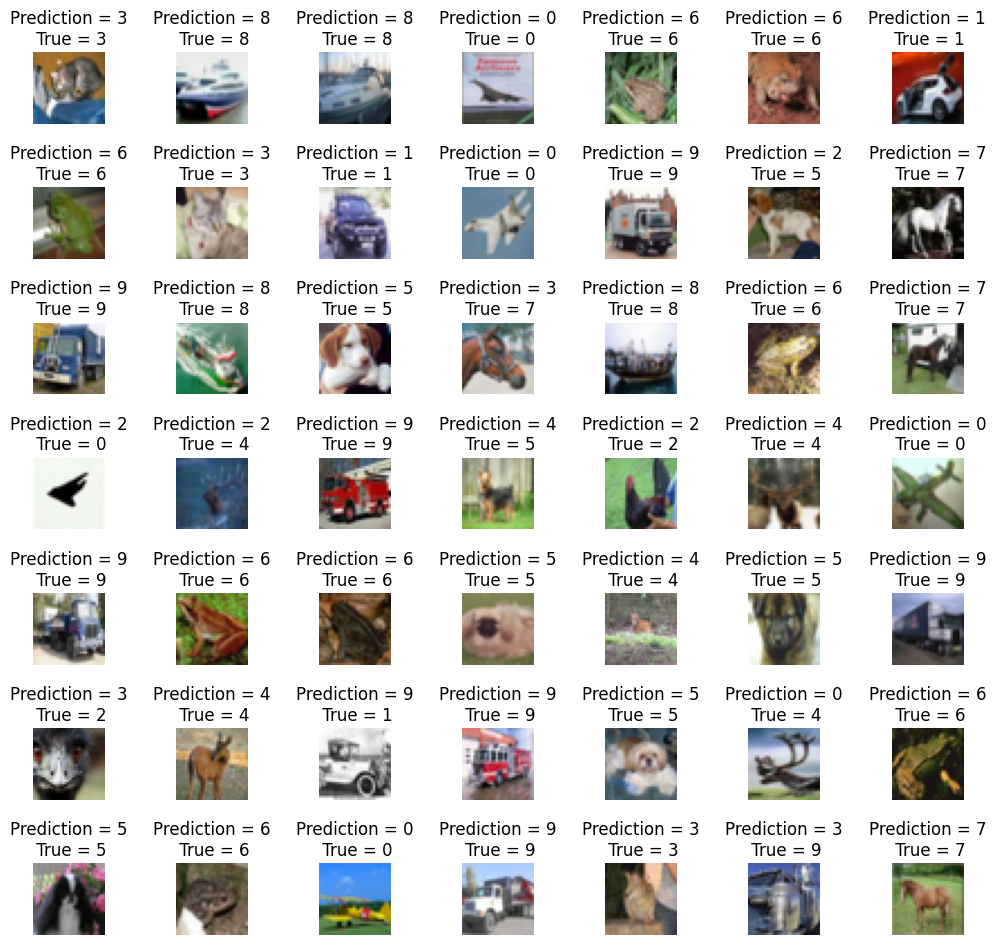

In [ ]:
# Evaluate the model and visualise it
evaluation = vasthu.evaluate(test_dataset, test_labels)
print('Test Accuracy: {}'.format(evaluation[1]))

predicted_classes = vasthu.predict(test_dataset)
predicted_classes=tensorflow.argmax(predicted_classes,axis=1)
test_labels = test_labels.argmax(1)
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(test_dataset[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], test_labels[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)